# Decision Tree Classifier
The decision tree is the best choice for this dataset because it can handle both numerical and categorical data. The decision tree is a white-box model, which means it is easy to interpret and explain. It can also handle multi-class classification problems, which is the case in this dataset. The decision tree is also robust to outliers and does not require feature scaling.

No further data preprocessing is required for the decision tree classifier. We can use the data as it is, with the categorical columns already encoded from csv. All features are relevant.

In [14]:
import pandas as pd

# Load the data from the user-provided text into a pandas dataframe
data = ""

file_path = 'Obesity_Dataset/Obesity_Dataset.csv'
with open(file_path, 'r') as file:
    data = file.read()

columns = [
    "Sex", "Age", "Height", "Overweight_Obese_Family", "Consumption_of_Fast_Food",
    "Frequency_of_Consuming_Vegetables", "Number_of_Main_Meals_Daily", "Food_Intake_Between_Meals",
    "Smoking", "Liquid_Intake_Daily", "Calculation_of_Calorie_Intake", "Physical_Exercise",
    "Schedule_Dedicated_to_Technology", "Type_of_Transportation_Used", "Class"
]

# Read the data into a pandas DataFrame
df = pd.read_csv(pd.io.common.StringIO(data), header=None, names=columns)

In [15]:
classes = df['Class'].value_counts()
print("Klassen im Datensatz:")
print(classes)

# Überprüfen, ob der Datensatz ausgeglichen ist
is_balanced = classes.min() / classes.max() > 0.5
print("\nIst der Datensatz ausgeglichen?", is_balanced)

Klassen im Datensatz:
2    658
3    592
4    287
1     73
Name: Class, dtype: int64

Ist der Datensatz ausgeglichen? False


Accuracy: 78.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.85      0.86      0.85       125
           2       0.78      0.73      0.76       131
           3       0.67      0.75      0.71        53

    accuracy                           0.79       322
   macro avg       0.79      0.80      0.79       322
weighted avg       0.79      0.79      0.79       322


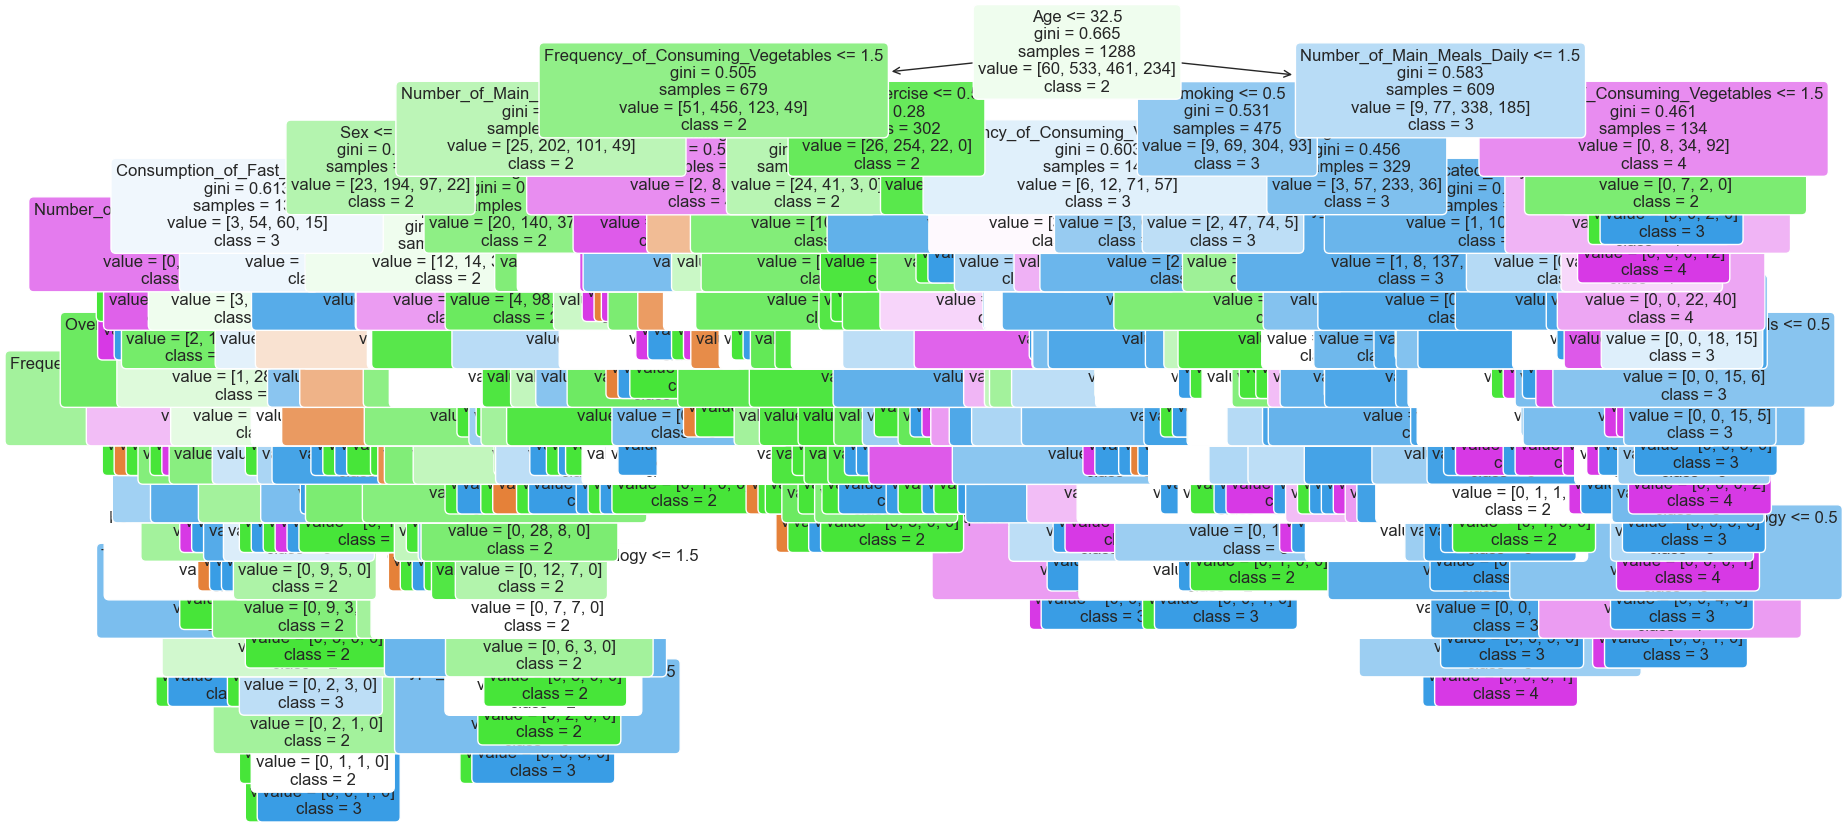

In [16]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Handle categorical data by encoding them
le = LabelEncoder()

# Encoding categorical columns that are in string form
df['Sex'] = le.fit_transform(df['Sex'])
df['Overweight_Obese_Family'] = le.fit_transform(df['Overweight_Obese_Family'])
df['Consumption_of_Fast_Food'] = le.fit_transform(df['Consumption_of_Fast_Food'])
df['Frequency_of_Consuming_Vegetables'] = le.fit_transform(df['Frequency_of_Consuming_Vegetables'])
df['Number_of_Main_Meals_Daily'] = le.fit_transform(df['Number_of_Main_Meals_Daily'])
df['Food_Intake_Between_Meals'] = le.fit_transform(df['Food_Intake_Between_Meals'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Liquid_Intake_Daily'] = le.fit_transform(df['Liquid_Intake_Daily'])
df['Calculation_of_Calorie_Intake'] = le.fit_transform(df['Calculation_of_Calorie_Intake'])
df['Physical_Exercise'] = le.fit_transform(df['Physical_Exercise'])
df['Schedule_Dedicated_to_Technology'] = le.fit_transform(df['Schedule_Dedicated_to_Technology'])
df['Type_of_Transportation_Used'] = le.fit_transform(df['Type_of_Transportation_Used'])
df['Class'] = le.fit_transform(df['Class'])

# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
# note: using ccp_alpha or max_depth to limit tree size reduces accuracy significantly
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size to fit the tree
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=le.classes_.astype(str).tolist(), rounded=True, fontsize=12)
plt.show()


Confusion Matrix:
[[ 11   2   0   0]
 [  1 107  17   0]
 [  1  14  96  20]
 [  0   3  10  40]]


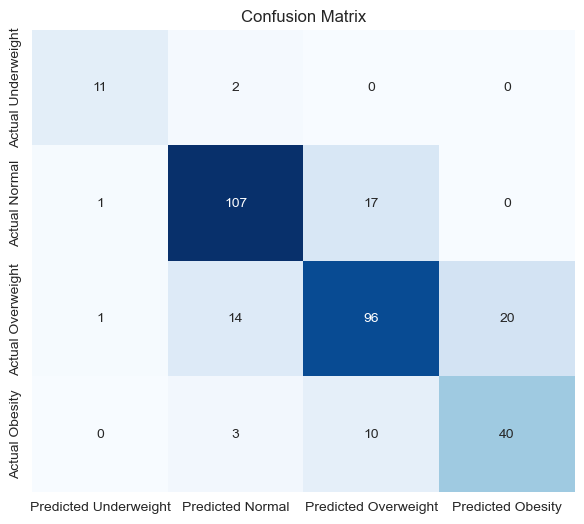

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix (multiple classes)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Define class labels
class_labels = ["Underweight", "Normal", "Overweight", "Obesity"]

# Convert to DataFrame for labeling
cm_labeled = pd.DataFrame(cm, index=[f"Actual {c}" for c in class_labels],
                          columns=[f"Predicted {c}" for c in class_labels])

# Plot heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_labeled, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add title
plt.title("Confusion Matrix")
plt.show()

Feature Importance:
                              Feature  Importance
1                                 Age    0.336206
2                              Height    0.110008
6          Number_of_Main_Meals_Daily    0.094377
5   Frequency_of_Consuming_Vegetables    0.086906
11                  Physical_Exercise    0.072758
0                                 Sex    0.052060
8                             Smoking    0.043915
7           Food_Intake_Between_Meals    0.041909
9                 Liquid_Intake_Daily    0.040448
13        Type_of_Transportation_Used    0.037560
12   Schedule_Dedicated_to_Technology    0.025434
4            Consumption_of_Fast_Food    0.025214
3             Overweight_Obese_Family    0.017946
10      Calculation_of_Calorie_Intake    0.015258


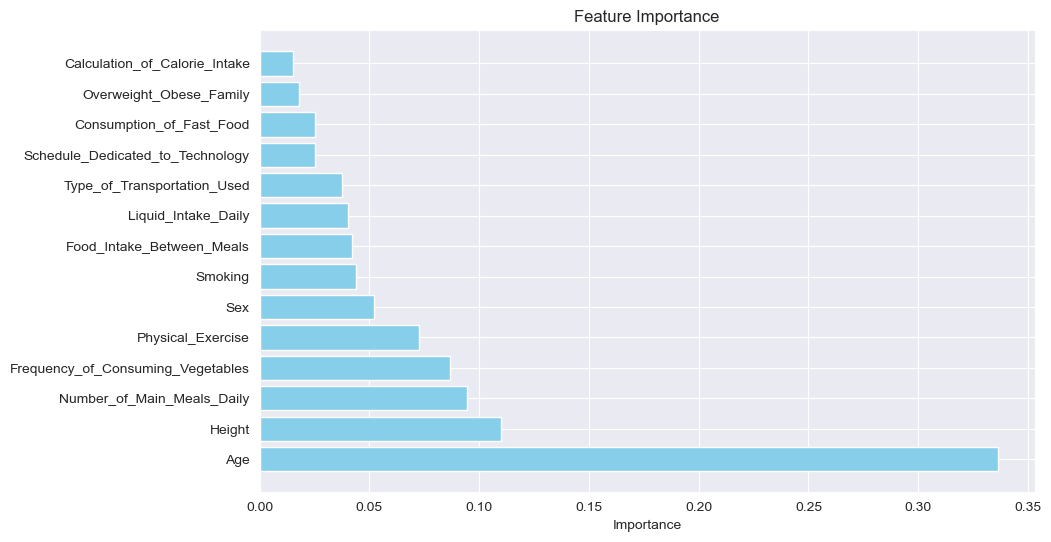

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance
importances = clf.feature_importances_

# Create a DataFrame for the features and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Reflektion

1. Unerwartete Fehlklassifikationen: Selbst gut trainierte Modelle machen scheinbar dumme Fehler. Ein kleiner Unterschied in den Eingabedaten kann völlig falsche Vorhersagen verursachen.

2. Datenqualität schlägt Modellkomplexität: Ein einfaches Modell mit sauberen Daten schlägt oft ein komplexes Modell mit schlechten Daten. Kleine Biases in den Daten können das ganze Modell verfälschen.

3. Hyperparameter sind entscheidender als gedacht: Ein schlecht gewählter Lernrate-Wert kann ein ansonsten perfektes Modell ruinieren. Manchmal bringt Feintuning mehr als ein komplexeres Modell.